In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
road = pd.read_csv("plain.edg.csv",sep=';')
edge = road[["edge_from","edge_id","edge_to","edge_speed"]].copy()
edge

,edge_from,edge_id,edge_to,edge_speed
0,3214939948,-114554802#0,1297403614,8.33
1,298368073,-114554802#1,3214939948,8.33
2,298368069,-114554802#2,298368073,8.33
3,3214939950,-114554802#3,298368069,8.33
4,7702074848,-114554802#4,3214939950,8.33
...,...,...,...,...
1705,1156114391,99988875,1156114393,8.33
1706,1156114393,99988876,1380961225,8.33
1707,311114949,99988877#0,298273573,8.33
1708,298273573,99988877#1,1456572633,8.33


In [3]:
edge["edge_speed"] = edge["edge_speed"].astype("float")
edge["edge_from"] = edge["edge_from"].astype("string")
edge["edge_to"] = edge["edge_to"].astype("string")
edge

,edge_from,edge_id,edge_to,edge_speed
0,3214939948,-114554802#0,1297403614,8.33
1,298368073,-114554802#1,3214939948,8.33
2,298368069,-114554802#2,298368073,8.33
3,3214939950,-114554802#3,298368069,8.33
4,7702074848,-114554802#4,3214939950,8.33
...,...,...,...,...
1705,1156114391,99988875,1156114393,8.33
1706,1156114393,99988876,1380961225,8.33
1707,311114949,99988877#0,298273573,8.33
1708,298273573,99988877#1,1456572633,8.33


In [24]:
pd.read_csv?

In [37]:
nod = pd.read_csv(
    "plain.nod.csv", 
    header = 0,
    skiprows = [1],
    delimiter = ";", 
    decimal = ",",
    usecols = ["node_id", "node_x", "node_y"],
    dtype = {
        "node_id": str,
        "node_x": str,
        "node_y": str,
    },
)
nod["node_x"] = nod["node_x"].astype("float")
nod["node_y"] = nod["node_y"].astype("float")
node = nod[["node_id","node_x","node_y"]].copy()
nod

,node_id,node_x,node_y
0,1003627114,943.37,611.25
1,1004552381,693.04,696.64
2,1004552577,697.05,695.79
3,1005429216,1053.05,361.74
4,1005473142,857.72,277.86
...,...,...,...
1074,988556190,1005.58,760.56
1075,988566055,990.98,302.10
1076,988566056,1021.38,302.35
1077,988566058,973.06,301.91


In [38]:
node.iloc[555]

node_id    3214939948
node_x          56.95
node_y         565.38
Name: 555, dtype: object

In [39]:
pos = dict([(i,np.array([x,y])) for i, x,y in zip(node.node_id, node.node_x, node.node_y)])
pos

{'1003627114': array([943.37, 611.25]),
 '1004552381': array([693.04, 696.64]),
 '1004552577': array([697.05, 695.79]),
 '1005429216': array([1053.05,  361.74]),
 '1005473142': array([857.72, 277.86]),
 '1005473202': array([848.92, 280.29]),
 '1005473289': array([842.06, 277.57]),
 '1005473391': array([863.19,  72.98]),
 '1005526387': array([946.91,  75.36]),
 '1005526433': array([733.44, 434.4 ]),
 '1005526490': array([737.59, 428.07]),
 '1007051486': array([854.82, 334.02]),
 '1007051492': array([647.29, 193.66]),
 '1007051629': array([851.37, 333.93]),
 '1007824351': array([112.34, 311.25]),
 '1007824554': array([125.88, 320.14]),
 '1011088523': array([634.23, 127.  ]),
 '1011256640': array([510.52, 201.11]),
 '1011256666': array([591.23,  78.14]),
 '1011256677': array([528.05, 174.41]),
 '1011415132': array([345.69, 454.24]),
 '1011463184': array([672.86, 548.5 ]),
 '1012497956': array([1041.99,  851.71]),
 '1012497968': array([1041.83,  856.97]),
 '1013224876': array([ 78.95, 289.

In [40]:
G = nx.from_pandas_edgelist(edge, source='edge_from', target='edge_to',
                            edge_attr='edge_speed')

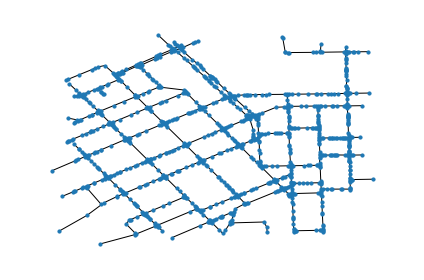

In [41]:
# nodes
nx.draw_networkx_nodes(G, pos, node_size=10)

# edges
nx.draw_networkx_edges(G, pos)  # using a 10x scale factor here

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

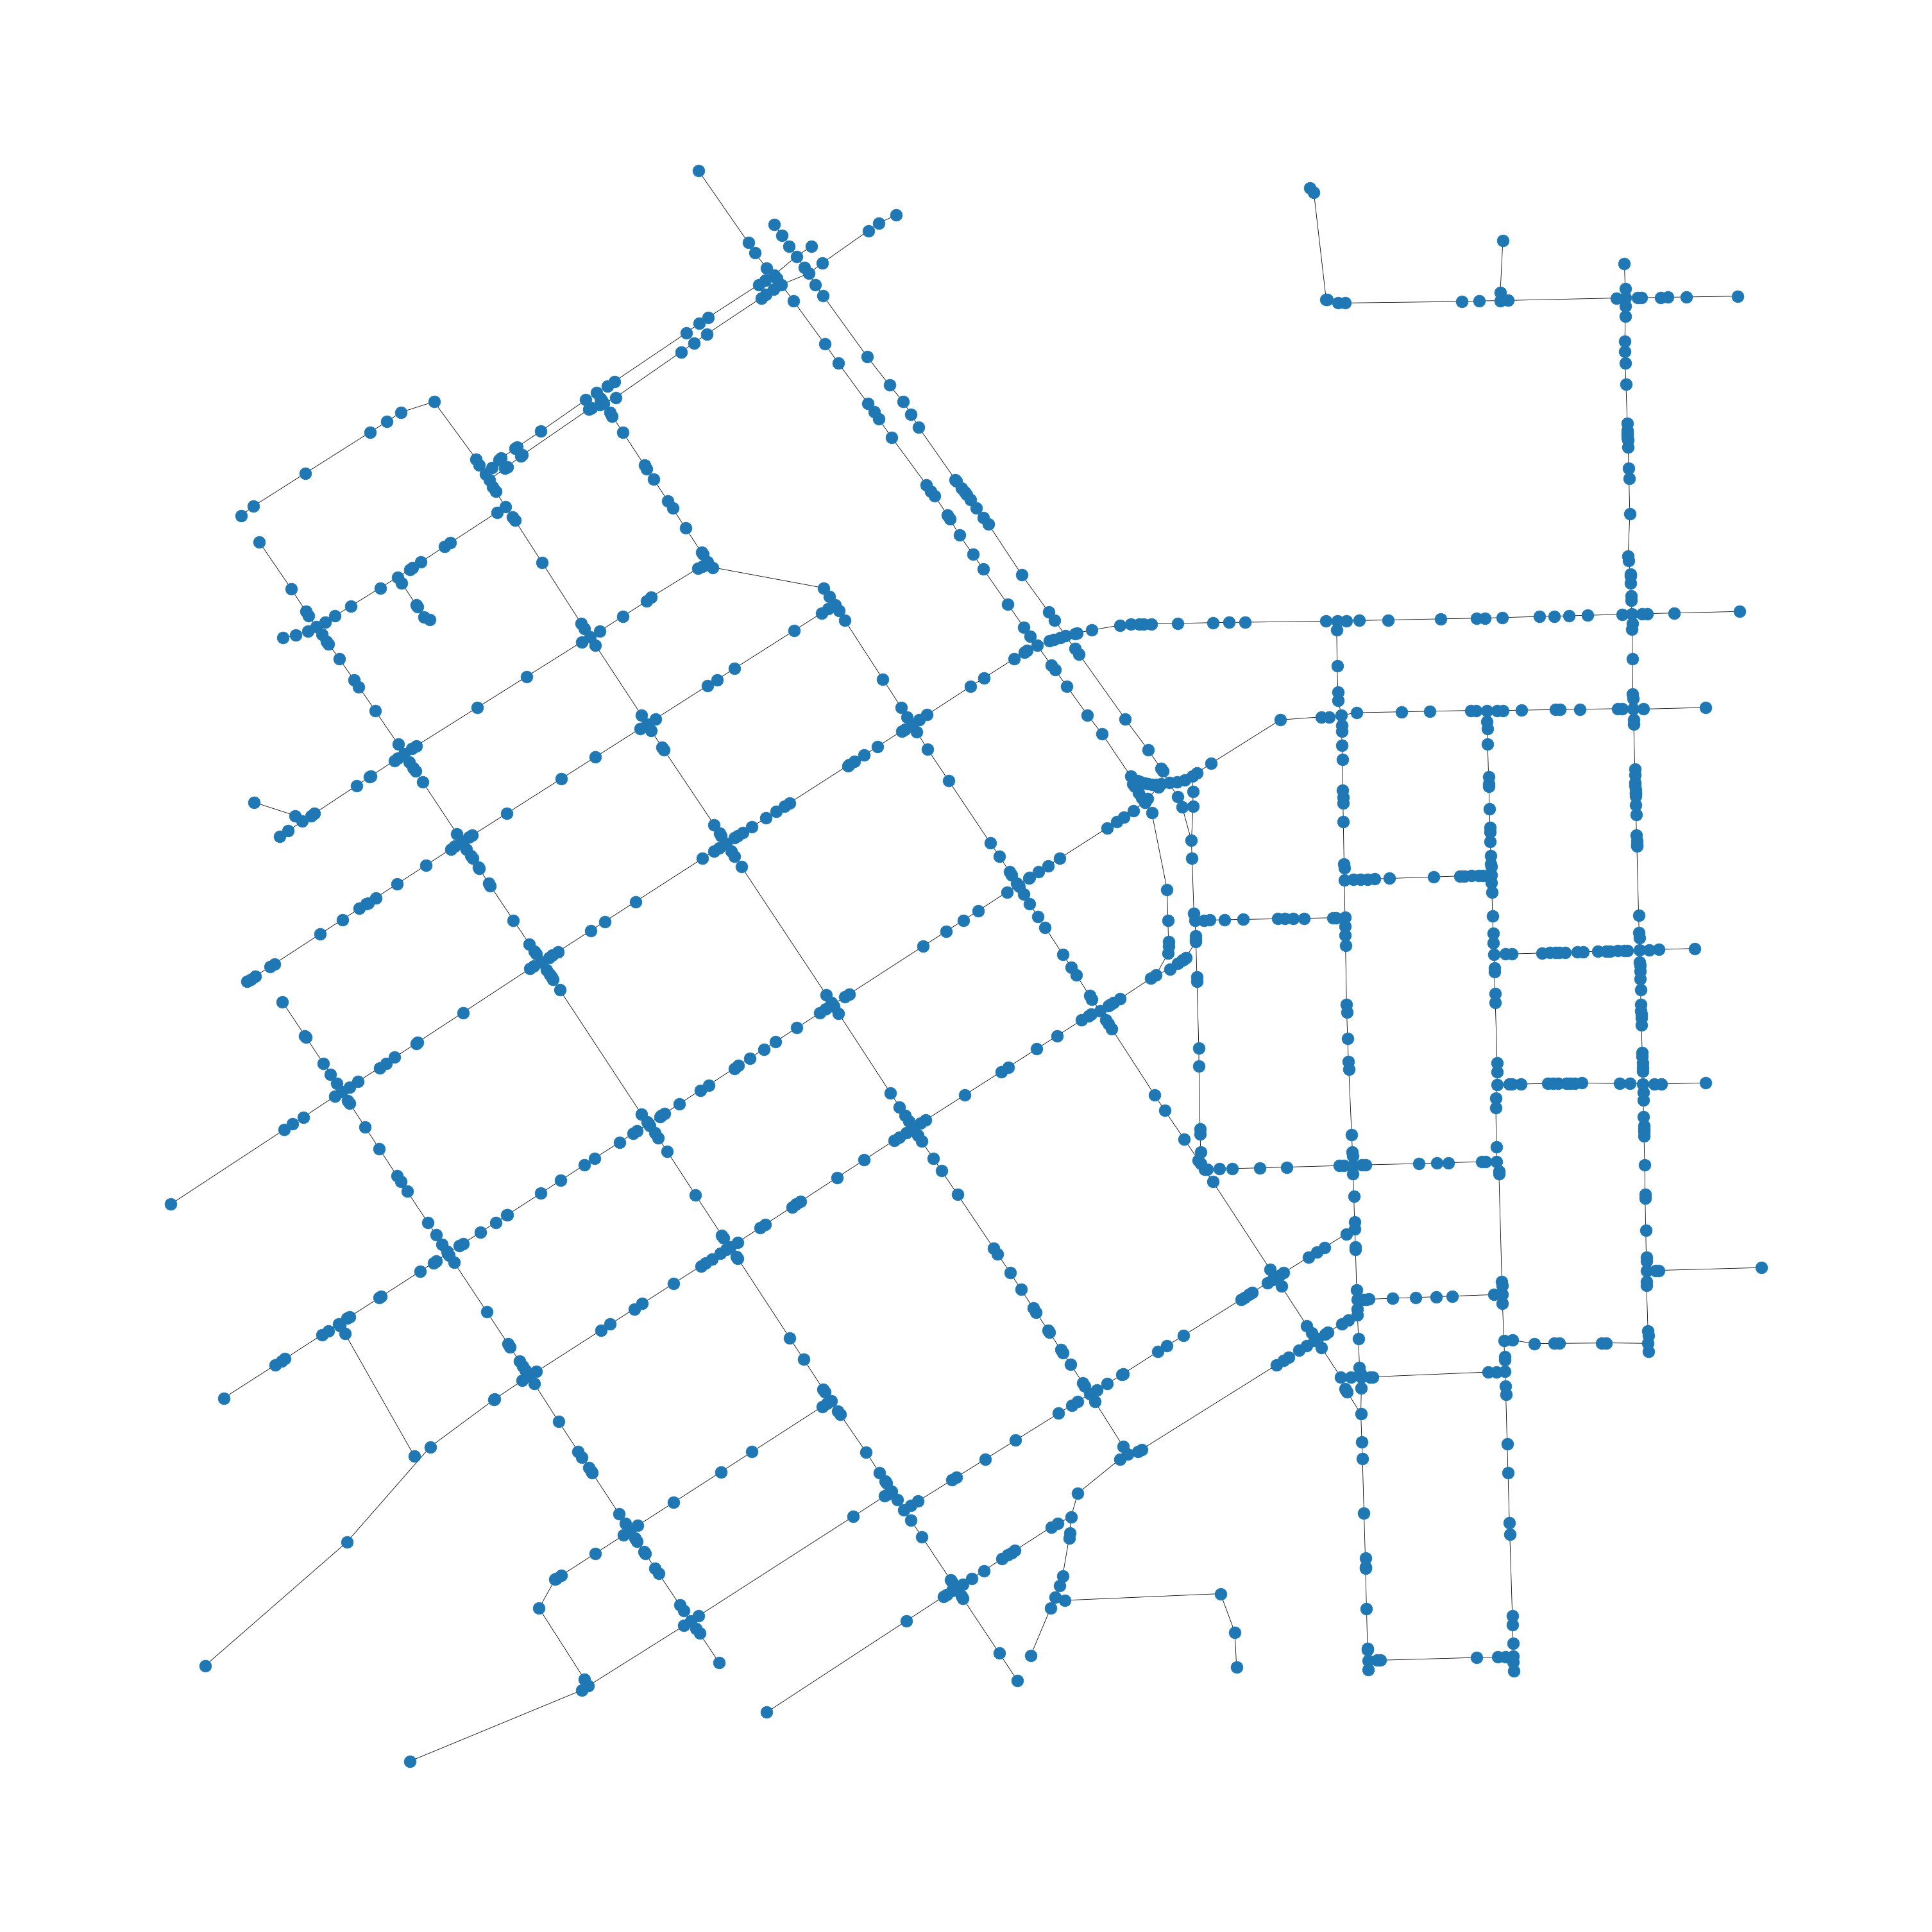

In [42]:
fig = plt.figure(1, figsize=(50, 50), dpi=60)
nx.draw(G,pos,node_size=500)